# Examples of K-means clustering
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/kmeans_introduction.ipynb)


Examples of running k-means clustering analysis applied to Old Faithful geyeser eruptions.

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
print('IN_COLAB = ' + str(IN_COLAB))

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd

linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100


IN_COLAB = False


### Get the data
This data comes from:
https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

It consists of a list of 272 geyser eruptions, each with to quantitative features: eruption duration (minutes) and delay between eruptions (minutes).

In [2]:
if IN_COLAB:
    !pip install wget
    import wget
    filename = wget.download("https://raw.githubusercontent.com/eabarnes1010/course_objective_analysis/main/data/old_faithful_eruptions.csv")
else:
    filename = '../data/old_faithful_eruptions.csv'
    
data = pd.read_csv(filename)
print(data.head())
data = data.values[:,1:]

   index  duration  delay
0      1     3.600     79
1      2     1.800     54
2      3     3.333     74
3      4     2.283     62
4      5     4.533     85


Now plot the data.

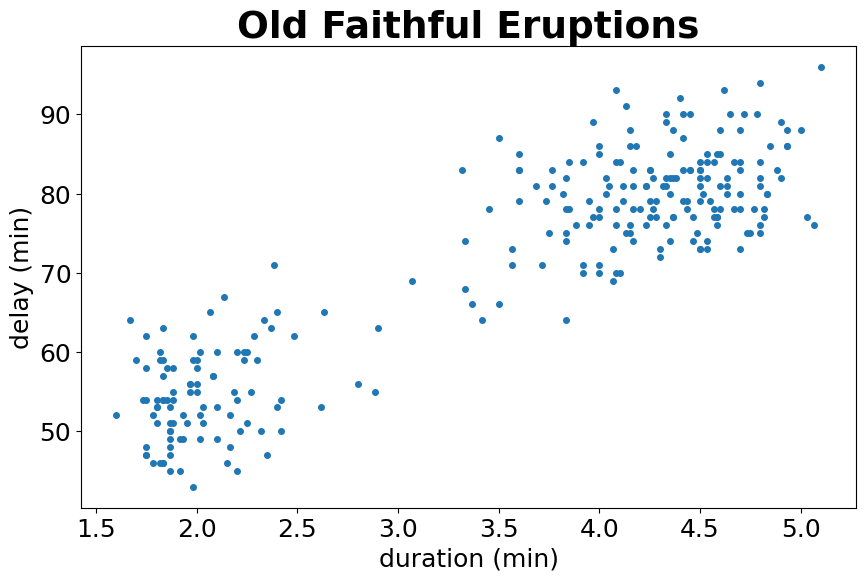

In [3]:
plt.figure(figsize=(10,6))
plt.plot(data[:,0],data[:,1],'.',markersize = 8)
plt.xlabel("duration (min)")
plt.ylabel("delay (min)")

plt.title('Old Faithful Eruptions')
plt.show()

### Perform k-means clustering with k=5 and k=2
Note that most of the code below is just to plots the results. The "magic" happens in two lines.

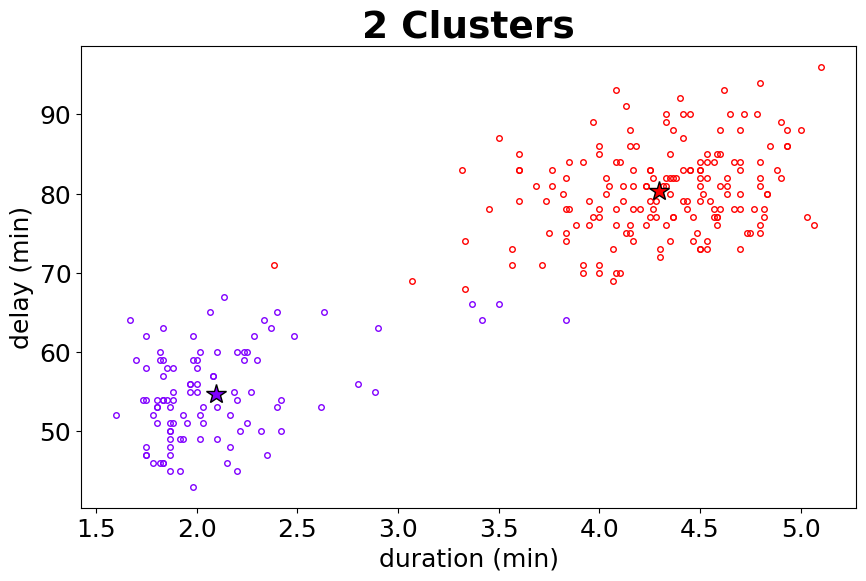

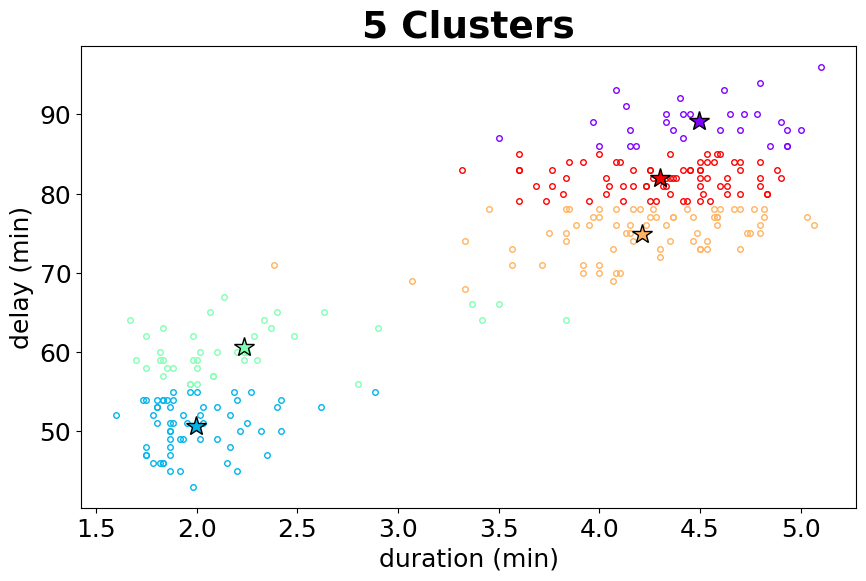

In [4]:
for NUM_CLUSTERS in [2,5]:
   
    #--------- kmeans-------------------------
    centroids, _ = kmeans(data, NUM_CLUSTERS, iter=20)
    idx, _ = vq(data,centroids)
    #-----------------------------------------------
    
    COLOR_MAT = cm.rainbow(np.linspace(0, 1, NUM_CLUSTERS))
    
    plt.figure(figsize=(10,6))
    plt.title(str(NUM_CLUSTERS) + ' Clusters')
        
    for (ind,val) in enumerate(data):
        plt.plot(val[0],val[1],'.',color = COLOR_MAT[idx[ind]], markersize = 8, markerfacecolor = 'none')
    
    for (ind,val) in enumerate(centroids):
        plt.plot(val[0],val[1],'*',color = COLOR_MAT[ind],markersize = 15,markeredgecolor = 'black')
    
    plt.xlabel("duration (min)")
    plt.ylabel("delay (min)")
    plt.show()

The figures above show the resulting final clusters using k=5 and k=2. As in other examples, the stars denote the final cluster centers and the data points are colored according to which cluster/center they are assigned to. Note that both give answers that *could* be reasonable, and it is up to me as a scientist to decide which is useful/physical/meaningful.